<a href="https://colab.research.google.com/github/Uzma-Jawed/AIandDataSci-class_work-and-practice/blob/main/Polynomial_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Polynomial Regression

### 🟣 Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## 🟣 Generate Synthetic Dataset

(quadratic with noise)

In [2]:
np.random.seed(42) # for reproducibility
m = 100 # number of samples


X = 6 * np.random.rand(m, 1) - 3 # values between -3 and 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # quadratic + noise

✅ `X` = features

✅ `y` = labels

# 🟣 Train–Test Split

To evaluate model performance realistically, we split the data into training and testing sets.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

## 🟣 Polynomial Regression Model (Degree = 2)

In [4]:
poly_reg = Pipeline([
("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
("lin_reg", LinearRegression())
])


poly_reg.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('lin_reg', LinearRegression())])

## 🟣 Predict & Visualize

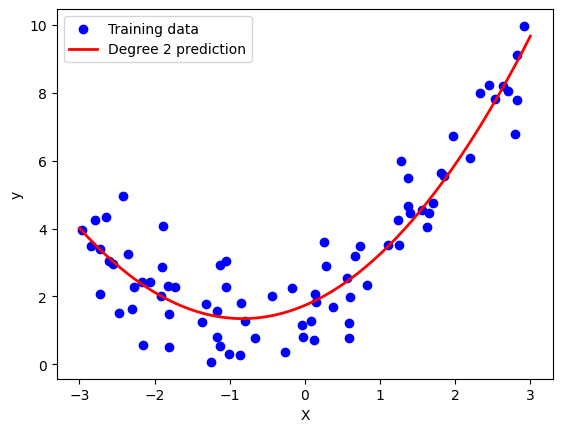

In [5]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_pred = poly_reg.predict(X_new)


plt.scatter(X_train, y_train, color="blue", label="Training data")
plt.plot(X_new, y_pred, color="red", linewidth=2, label="Degree 2 prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## 🟣 Trying Different Degrees

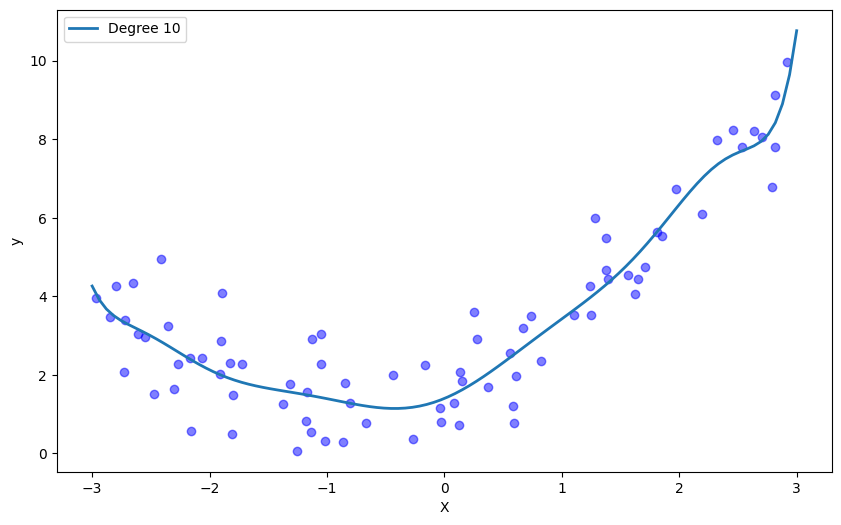

In [7]:
plt.figure(figsize=(10,6))


for degree in [1, 2, 5, 10]:
    poly_reg = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("lin_reg", LinearRegression())
])
poly_reg.fit(X_train, y_train)
y_pred = poly_reg.predict(X_new)


plt.plot(X_new, y_pred, linewidth=2, label=f"Degree {degree}")


plt.scatter(X_train, y_train, color="blue", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

* Degree 1 (Linear Regression) → Underfits

* Degree 2 (Quadratic) → Good fit

* Degree 5 or 10 → Overfits (too wiggly)

Higher-degree polynomials may perform extremely well on training data but fail to generalize on unseen data.

## 🟣 Model Evaluation

We use:

* MSE (Mean Squared Error) → Lower = Better

* R² Score → Closer to 1 = Better

In [8]:
for degree in [1, 2, 5, 10]:
    poly_reg = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("lin_reg", LinearRegression())
    ])
    poly_reg.fit(X, y)
    y_pred = poly_reg.predict(X)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"Degree {degree}: MSE={mse:.2f}, R²={r2:.3f}")

Degree 1: MSE=3.02, R²=0.426
Degree 2: MSE=0.78, R²=0.853
Degree 5: MSE=0.76, R²=0.855
Degree 10: MSE=0.74, R²=0.860


# 🟣 Key Insights

* Degree 1 (Linear) → Cannot capture non-linear patterns (underfitting)

* Degree 2 → Best balance between bias and variance

* Higher degrees → High variance and overfitting

* Model performance should always be evaluated on unseen test data

# 📌 Conclusion

Polynomial Regression is effective when data follows a non-linear trend. However, choosing the correct polynomial degree is crucial:

* Low degree → Underfitting

* Optimal degree → Best generalization

* High degree → Overfitting

In practice, cross-validation should be used to automatically select the best polynomial degree.

✨ This notebook demonstrates the complete workflow: data generation → train-test split → polynomial regression → visualization → evaluation.